In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing

In [3]:
data = pd.read_csv("general_data.csv")

In [4]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [9]:
data1 = data[['Age','DistanceFromHome','MonthlyIncome','TrainingTimesLastYear','JobLevel','YearsAtCompany','Attrition']]

In [10]:
label_encoder = preprocessing.LabelEncoder()

In [11]:
encoded_attrition = label_encoder.fit_transform(data1["Attrition"])

In [13]:
data1["Attrition"] = encoded_attrition

C:\Users\Personal\Anaconda3.0\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
data1.head()

,Age,DistanceFromHome,MonthlyIncome,TrainingTimesLastYear,JobLevel,YearsAtCompany,Attrition
0,51,6,131160,6,1,1,0
1,31,10,41890,3,1,5,1
2,32,17,193280,2,4,5,0
3,38,2,83210,5,3,8,0
4,32,10,23420,2,1,6,0


In [15]:
tree_model = tree.DecisionTreeClassifier()

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
data1.columns

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'TrainingTimesLastYear',
       'JobLevel', 'YearsAtCompany', 'Attrition'],
      dtype='object')

In [19]:
rf_model = RandomForestClassifier(n_estimators = 1000,max_features = 2,oob_score=True)

In [22]:
features = ['Age','DistanceFromHome','MonthlyIncome','TrainingTimesLastYear','JobLevel','YearsAtCompany']

In [23]:
rf_model.fit(X = data1[features],y=data1["Attrition"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [24]:
print(rf_model.oob_score_)

1.0


In [25]:
for feature,imp in zip(features,rf_model.feature_importances_):
    print(feature,imp)

Age 0.2145495515444561
DistanceFromHome 0.1694612038869705
MonthlyIncome 0.2856893633743293
TrainingTimesLastYear 0.08782748796857569
JobLevel 0.07772633389989075
YearsAtCompany 0.16474605932577818


Here we will consider top 3 values from oob score that is,
MonthlyIncome

Age

DistanceFromHome

In [27]:
predictors = pd.DataFrame([data1['MonthlyIncome'],data1['Age'],data1['DistanceFromHome']]).T

In [28]:
tree_model = tree.DecisionTreeClassifier(max_depth = 8)

In [29]:
tree_model.fit(X=predictors, y = data1['Attrition'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
with open("Resultforattrition.dot",'w') as f:
    f = tree.export_graphviz(tree_model,feature_names = ["MonthlyIncome","Age","DistanceFromHome"],out_file = f)

__DTree__
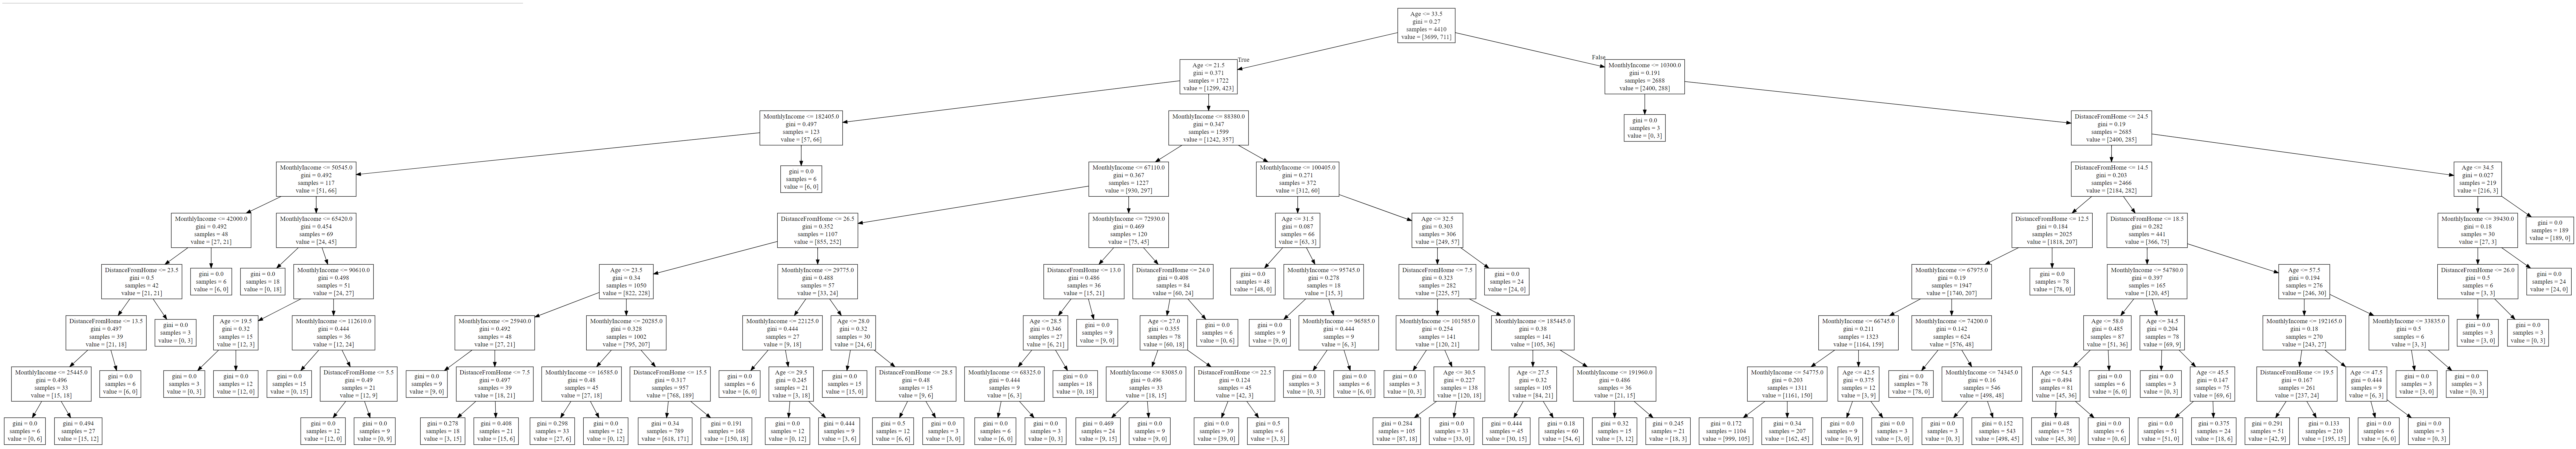

In [31]:
tree_model.score(X = predictors,y = data1["Attrition"])

0.8782312925170068

The model is 87% accurate.